# Part 2: Transform, Clean, and Analyze

In [59]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
import ast
from sklearn.preprocessing import MultiLabelBinarizer


In [2]:
PROCESSED_DATA_PATH = 'data/processed'
TRANFORMED_DATA_PATH = 'data/transformed'

In [3]:
Path(TRANFORMED_DATA_PATH).mkdir(parents=True, exist_ok=True)

In [116]:
# Using Kaggle Dataset and API Data
kaggle_ai_job_market_df = pd.read_csv(f"{PROCESSED_DATA_PATH}/ai_job_market.csv")
api_ai_data_df = pd.read_csv(f"{PROCESSED_DATA_PATH}/processed_api_data_jobdataapi.csv",
                             na_filter=['NULL', "N/A", "NaN"])

## Data Quality and Transformation

### 1. Kaggle AI Job Market Data

#### Data Quality Assessment

In [5]:
kaggle_ai_job_market_df.head()

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain"
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow"
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn"
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow"
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain"


In [6]:
kaggle_ai_job_market_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   job_id            2000 non-null   int64
 1   company_name      2000 non-null   str  
 2   industry          2000 non-null   str  
 3   job_title         2000 non-null   str  
 4   skills_required   2000 non-null   str  
 5   experience_level  2000 non-null   str  
 6   employment_type   2000 non-null   str  
 7   location          2000 non-null   str  
 8   salary_range_usd  2000 non-null   str  
 9   posted_date       2000 non-null   str  
 10  company_size      2000 non-null   str  
 11  tools_preferred   2000 non-null   str  
dtypes: int64(1), str(11)
memory usage: 187.6 KB


In [7]:
print("Total Null Values:\n", kaggle_ai_job_market_df.isna().sum())

Total Null Values:
 job_id              0
company_name        0
industry            0
job_title           0
skills_required     0
experience_level    0
employment_type     0
location            0
salary_range_usd    0
posted_date         0
company_size        0
tools_preferred     0
dtype: int64


In [8]:
print("Total Duplicate rows: ", kaggle_ai_job_market_df.duplicated().sum())

Total Duplicate rows:  0


#### Transformation and Cleaning

In [9]:
# splitting salary range to min and max
kaggle_ai_job_market_df[['salary_min_usd', 'salary_max_usd']] = (
    kaggle_ai_job_market_df['salary_range_usd']
    .str.split('-', expand=True)
    .astype(float)
)
kaggle_ai_job_market_df.drop(['salary_range_usd'], axis=1, inplace=True)

In [10]:
# comverting posted_date column to datetime
kaggle_ai_job_market_df['posted_date'] = pd.to_datetime(
    kaggle_ai_job_market_df['posted_date'],
    format='%Y-%m-%d'
)

In [11]:
# summary of all numerical and datetime columns
kaggle_ai_job_market_df.describe()

,job_id,posted_date,salary_min_usd,salary_max_usd
count,2000.000000,2000,2000.000000,2000.000000
mean,1000.500000,2024-09-21 15:00:00,95374.602000,150705.401000
min,1.000000,2023-09-21 00:00:00,40044.000000,54162.000000
25%,500.750000,2024-03-20 18:00:00,68234.500000,120751.250000
50%,1000.500000,2024-09-26 00:00:00,95440.000000,151337.500000
75%,1500.250000,2025-03-16 00:00:00,123580.500000,182200.000000
max,2000.000000,2025-09-19 00:00:00,149975.000000,247578.000000
std,577.494589,NaN,31882.260505,41716.198452


In [12]:
# getting numerical, categorical, and datetime columns list
numerical_columns = kaggle_ai_job_market_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = kaggle_ai_job_market_df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()
datetime_columns = kaggle_ai_job_market_df.select_dtypes(include=['datetime', 'datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()

print("Numerical Columns:\n", numerical_columns)
print("\nCategorical Columns:\n", categorical_columns)
print("\nDatetime Columns:\n", datetime_columns)

Numerical Columns:
 ['job_id', 'salary_min_usd', 'salary_max_usd']

Categorical Columns:
 ['company_name', 'industry', 'job_title', 'skills_required', 'experience_level', 'employment_type', 'location', 'company_size', 'tools_preferred']

Datetime Columns:
 ['posted_date']


In [ ]:
# save transformed data
kaggle_ai_job_market_df.to_csv(f"{TRANFORMED_DATA_PATH}/cleaned_kaggle_ai_job_data.csv", index=False)

#### Exploratory Analysis and Visualization

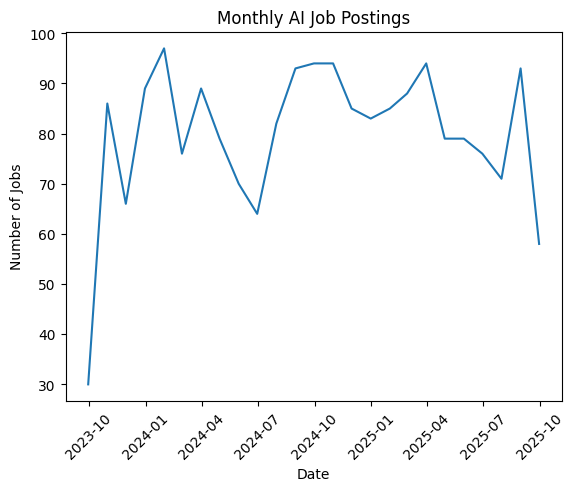

In [ ]:
# Jobs per month trend
monthly_jobs = kaggle_ai_job_market_df.resample('ME', on='posted_date').size()

plt.plot(monthly_jobs)
plt.title("Monthly AI Job Postings")
plt.xlabel("Date")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.show()

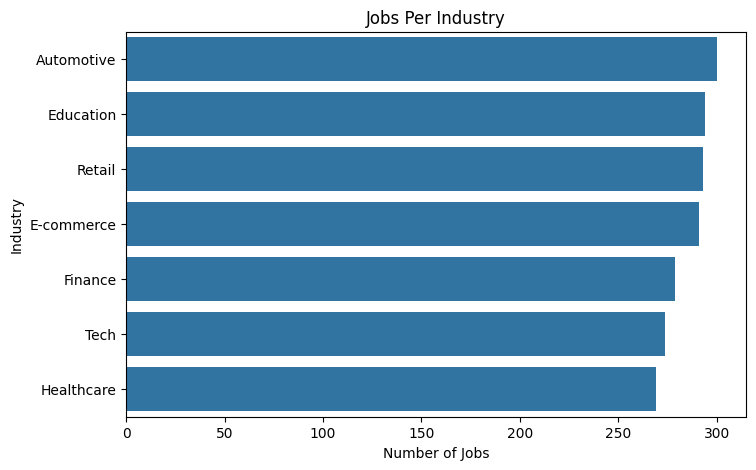

In [25]:
# Jobs per industry
industry_counts = kaggle_ai_job_market_df['industry'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=industry_counts.values, y=industry_counts.index)
plt.title("Jobs Per Industry")
plt.xlabel("Number of Jobs")
plt.ylabel("Industry")
plt.show()

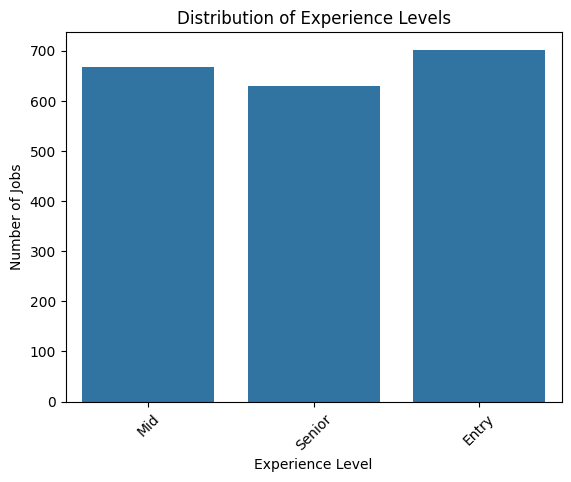

In [28]:
# jobs distribution based on experience level
sns.countplot(data=kaggle_ai_job_market_df, x='experience_level')
plt.title("Distribution of Experience Levels")
plt.xticks(rotation=45)
plt.xlabel("Experience Level")
plt.ylabel("Number of Jobs")
plt.show()

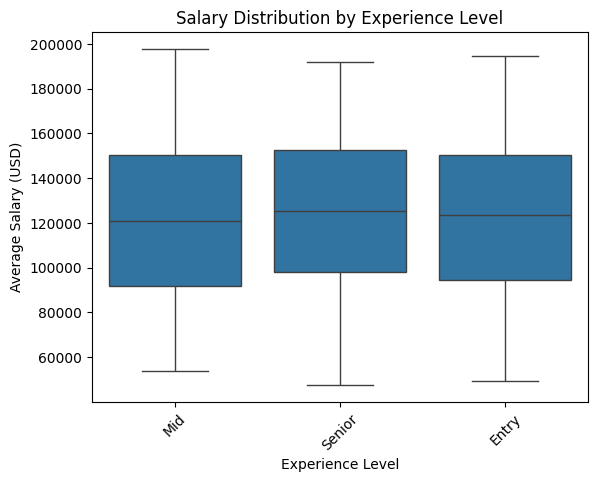

In [34]:
# Average Salary vs Experience
avg_df = kaggle_ai_job_market_df.copy()
avg_df['average_salary'] = (avg_df['salary_min_usd'] + avg_df['salary_max_usd']) / 2
sns.boxplot(data=avg_df, x='experience_level', y='average_salary')
plt.title("Salary Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.show()

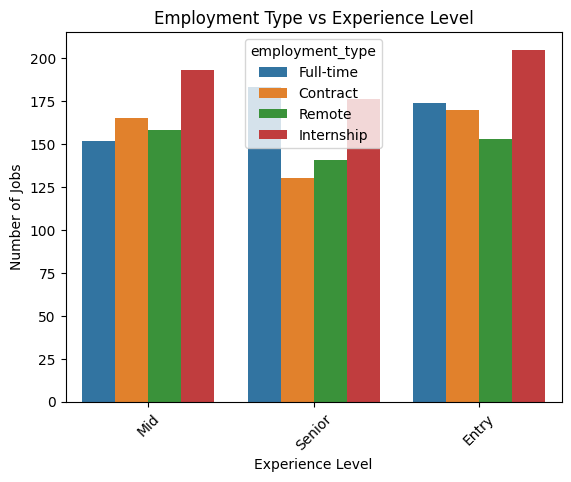

In [36]:
sns.countplot(
    data=kaggle_ai_job_market_df,
    x='experience_level',
    hue='employment_type'
)

plt.title("Employment Type vs Experience Level")
plt.xticks(rotation=45)
plt.ylabel("Number of Jobs")
plt.xlabel("Experience Level")
plt.show()

### 2. API AI Data

#### Data Quality Assessment

In [117]:
api_ai_data_df.head(10)

,id,company,location,job_types,company_website,company_linkedin,company_twitter_handle,company_github,regions,has_remote,published_at,job_description,experience_level,application_url,language,min_salary,max_salary,salary_currency
0,38076620,Komodo Health,"San Francisco, California",['Full Time'],https://www.komodohealth.com/,https://www.linkedin.com/company/komodo-health/,KomodoHealth,https://github.com/komodohealth,['North America'],False,2026-02-14T00:33:35Z,<p><strong>We Breathe Life Into Data</strong><...,EX,https://job-boards.greenhouse.io/komodohealth/...,en,NaN,NaN,NaN
1,38085020,NEORIS,Mexico,['Full Time'],https://www.neoris.com,https://www.linkedin.com/company/neoris/,neoris_eng,NaN,['North America'],False,2026-02-13T23:21:02Z,<p>NEORIS es un acelerador Digital que ayuda a...,SE,https://job-boards.eu.greenhouse.io/neoris/job...,es,NaN,NaN,NaN
2,38106278,Tennessee Board of Regents,Franklin,['Full Time'],https://www.tbr.edu/,https://www.linkedin.com/company/tennessee-boa...,CollegeSystemTN,NaN,['North America'],False,2026-02-13T18:00:00Z,<p><strong>The Artificial Intelligence Directo...,EX,https://careers.pageuppeople.com/1126/cw/en-us...,en,NaN,NaN,NaN
3,38077249,CI&T,Brazil,['Full Time'],https://ciandt.com/,https://www.linkedin.com/company/ciandt/,ciandt,https://github.com/ciandt,['South America'],False,2026-02-13T17:56:34Z,<span>Somos especialistas em <b>transformação ...,SE,https://jobs.lever.co/ciandt/d76c70fa-7ca1-4d2...,pt,NaN,NaN,NaN
4,38117201,Johns Hopkins University,"Baltimore, MD, 21218",['Full Time'],https://www.jhu.edu/,https://www.linkedin.com/school/johns-hopkins-...,JohnsHopkins,NaN,['North America'],False,2026-02-13T13:11:44Z,<h3>Description</h3><p><strong>Faculty positio...,NaN,https://apply.interfolio.com/171939,en,NaN,NaN,NaN
5,38031854,EWOR GmbH,"Leeds, United Kingdom",['Contract'],https://ewor.com,https://www.linkedin.com/company/ewor/,NaN,NaN,['Europe'],True,2026-02-13T09:36:04Z,<p>We are looking to hire ambitious entreprene...,NaN,https://join.com/companies/ewor/15700618-artif...,en,NaN,NaN,NaN
6,38031858,EWOR GmbH,Canada - Remote,['Contract'],https://ewor.com,https://www.linkedin.com/company/ewor/,NaN,NaN,['North America'],True,2026-02-13T09:23:13Z,<p>We are looking to hire ambitious entreprene...,NaN,https://join.com/companies/ewor/15700384-artif...,en,NaN,NaN,NaN
7,38031863,EWOR GmbH,Denmark - Remote,['Contract'],https://ewor.com,https://www.linkedin.com/company/ewor/,NaN,NaN,['Europe'],True,2026-02-13T09:23:09Z,<p>We are looking to hire ambitious entreprene...,NaN,https://join.com/companies/ewor/15700382-artif...,en,NaN,NaN,NaN
8,38031856,EWOR GmbH,"Geneva, Switzerland",['Contract'],https://ewor.com,https://www.linkedin.com/company/ewor/,NaN,NaN,['Europe'],True,2026-02-13T08:51:18Z,<p>We are looking to hire ambitious entreprene...,NaN,https://join.com/companies/ewor/15700098-artif...,en,NaN,NaN,NaN
9,38031861,EWOR GmbH,United States - Remote,['Contract'],https://ewor.com,https://www.linkedin.com/company/ewor/,NaN,NaN,['North America'],True,2026-02-13T08:51:14Z,<p>We are looking to hire ambitious entreprene...,NaN,https://join.com/companies/ewor/15700094-artif...,en,NaN,NaN,NaN


In [118]:
api_ai_data_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      100 non-null    int64  
 1   company                 100 non-null    str    
 2   location                100 non-null    str    
 3   job_types               100 non-null    str    
 4   company_website         100 non-null    str    
 5   company_linkedin        99 non-null     str    
 6   company_twitter_handle  58 non-null     str    
 7   company_github          3 non-null      str    
 8   regions                 100 non-null    str    
 9   has_remote              100 non-null    bool   
 10  published_at            100 non-null    str    
 11  job_description         100 non-null    str    
 12  experience_level        60 non-null     str    
 13  application_url         100 non-null    str    
 14  language                100 non-null    str    
 15  m

In [119]:
print("Total Null Values:\n", api_ai_data_df.isna().sum())

Total Null Values:
 id                          0
company                     0
location                    0
job_types                   0
company_website             0
company_linkedin            1
company_twitter_handle     42
company_github             97
regions                     0
has_remote                  0
published_at                0
job_description             0
experience_level           40
application_url             0
language                    0
min_salary                100
max_salary                100
salary_currency           100
dtype: int64


In [120]:
print("Total Duplicate rows: ", api_ai_data_df.duplicated().sum())

Total Duplicate rows:  0


#### Transformation and Cleaning

In [121]:
# Dropping Columns min_salary, max_salary, salary_currency, company_github, 
# company_twitter_handle as not much data available for these
api_ai_data_df.drop(['min_salary', 'max_salary', 'salary_currency',
                     'company_github', 'company_twitter_handle'], axis=1, inplace=True)

In [122]:
# Filling experience_level with 'Not Specified' 
# where values are missing to preserve data 
api_ai_data_df['experience_level'] = api_ai_data_df['experience_level'].fillna("Not Specified")

In [123]:
# with only one entry woth no linkedin, simply imputing with 'Not Available'
api_ai_data_df['company_linkedin'] = api_ai_data_df['company_linkedin'].fillna("Not Available")

In [124]:
# converting date to datetime
api_ai_data_df['published_at'] = pd.to_datetime(
    api_ai_data_df['published_at'], 
    utc=True 
)

In [125]:
# print unique values of categorical columns
columns_to_check = ['job_types', 'has_remote', 'experience_level', 'language', 'regions']

for col in columns_to_check:
    print(f"Unique values in {col}:")
    print(api_ai_data_df[col].unique())
    print("-" * 40)

Unique values in job_types:
<StringArray>
[                           '['Full Time']',
                             '['Contract']',
              '['Full Time', 'Internship']',
               '['Full Time', 'Temporary']',
                            '['Part Time']',
   '['Full Time', 'Temporary', 'Contract']',
 '['Full Time', 'Temporary', 'Internship']']
Length: 7, dtype: str
----------------------------------------
Unique values in has_remote:
[False  True]
----------------------------------------
Unique values in experience_level:
<StringArray>
['EX', 'SE', 'Not Specified', 'EN', 'MI']
Length: 5, dtype: str
----------------------------------------
Unique values in language:
<StringArray>
['en', 'es', 'pt', 'nl', 'it']
Length: 5, dtype: str
----------------------------------------
Unique values in regions:
<StringArray>
[               '['North America']',                '['South America']',
                       '['Europe']',                  '['Middle East']',
                 '['A

In [126]:
# map languages to Names
language_map = {
    'en': 'English',
    'es': 'Spanish',
    'pt': 'Portuguese',
    'nl': 'Dutch',
    'it': 'Italian'
}

api_ai_data_df['language'] = api_ai_data_df['language'].map(language_map)

In [127]:
# map experience level to names
exp_map = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive',
    'Not Specified': 'Not Specified'
}

api_ai_data_df['experience_level'] = api_ai_data_df['experience_level'].map(exp_map)

In [128]:
# Map job_types column to seprate columns for each type and add 1,0 there

# first convert entries to literal lists
api_ai_data_df['job_types'] = api_ai_data_df['job_types'].apply(ast.literal_eval)

# using MultiLabelBinarizer to create multiple columns
mlb = MultiLabelBinarizer()
job_type_encoded = pd.DataFrame(
    mlb.fit_transform(api_ai_data_df['job_types']),
    columns=mlb.classes_,
    index=api_ai_data_df.index
)

# merge back into original dataframe
api_ai_data_df = pd.concat([api_ai_data_df, job_type_encoded], axis=1)

# drop list job_types column
api_ai_data_df.drop(['job_types'], axis=1, inplace=True)

In [129]:
# Map regions column to seprate columns for each region and add 1,0 there

# first convert entries to literal lists
api_ai_data_df['regions'] = api_ai_data_df['regions'].apply(ast.literal_eval)

# using MultiLabelBinarizer to create multiple columns
mlb = MultiLabelBinarizer()
job_type_encoded = pd.DataFrame(
    mlb.fit_transform(api_ai_data_df['regions']),
    columns=mlb.classes_,
    index=api_ai_data_df.index
)

# merge back into original dataframe
api_ai_data_df = pd.concat([api_ai_data_df, job_type_encoded], axis=1)

# drop list job_types column
api_ai_data_df.drop(['regions'], axis=1, inplace=True)

In [130]:
# getting numerical, categorical, and datetime columns list
numerical_columns = api_ai_data_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = api_ai_data_df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()
datetime_columns = api_ai_data_df.select_dtypes(include=['datetime', 'datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()

print("Numerical Columns:\n", numerical_columns)
print("\nCategorical Columns:\n", categorical_columns)
print("\nDatetime Columns:\n", datetime_columns)

Numerical Columns:
 ['id', 'Contract', 'Full Time', 'Internship', 'Part Time', 'Temporary', 'Asia/Pacific', 'Europe', 'Middle East', 'North America', 'South America']

Categorical Columns:
 ['company', 'location', 'company_website', 'company_linkedin', 'job_description', 'experience_level', 'application_url', 'language']

Datetime Columns:
 ['published_at']


In [131]:
api_ai_data_df.head()

,id,company,location,company_website,company_linkedin,has_remote,published_at,job_description,experience_level,application_url,language,Contract,Full Time,Internship,Part Time,Temporary,Asia/Pacific,Europe,Middle East,North America,South America
0,38076620,Komodo Health,"San Francisco, California",https://www.komodohealth.com/,https://www.linkedin.com/company/komodo-health/,False,2026-02-14 00:33:35+00:00,<p><strong>We Breathe Life Into Data</strong><...,Executive,https://job-boards.greenhouse.io/komodohealth/...,English,0,1,0,0,0,0,0,0,1,0
1,38085020,NEORIS,Mexico,https://www.neoris.com,https://www.linkedin.com/company/neoris/,False,2026-02-13 23:21:02+00:00,<p>NEORIS es un acelerador Digital que ayuda a...,Senior Level,https://job-boards.eu.greenhouse.io/neoris/job...,Spanish,0,1,0,0,0,0,0,0,1,0
2,38106278,Tennessee Board of Regents,Franklin,https://www.tbr.edu/,https://www.linkedin.com/company/tennessee-boa...,False,2026-02-13 18:00:00+00:00,<p><strong>The Artificial Intelligence Directo...,Executive,https://careers.pageuppeople.com/1126/cw/en-us...,English,0,1,0,0,0,0,0,0,1,0
3,38077249,CI&T,Brazil,https://ciandt.com/,https://www.linkedin.com/company/ciandt/,False,2026-02-13 17:56:34+00:00,<span>Somos especialistas em <b>transformação ...,Senior Level,https://jobs.lever.co/ciandt/d76c70fa-7ca1-4d2...,Portuguese,0,1,0,0,0,0,0,0,0,1
4,38117201,Johns Hopkins University,"Baltimore, MD, 21218",https://www.jhu.edu/,https://www.linkedin.com/school/johns-hopkins-...,False,2026-02-13 13:11:44+00:00,<h3>Description</h3><p><strong>Faculty positio...,Not Specified,https://apply.interfolio.com/171939,English,0,1,0,0,0,0,0,0,1,0


In [132]:
# save transformed data
api_ai_data_df.to_csv(f"{TRANFORMED_DATA_PATH}/cleaned_api_ai_job_data.csv", index=False)

#### Exploratory Analysis and Visualization

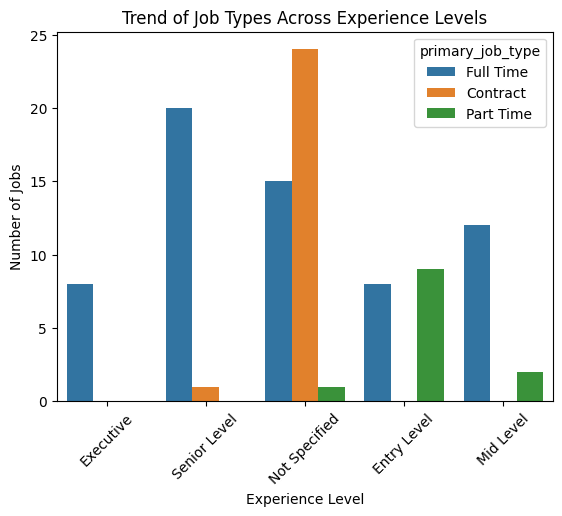

In [133]:
# Trend of Experience vs Job_type
job_type_cols = ['Contract', 'Full Time', 'Internship', 'Part Time', 'Temporary']
job_type_df = api_ai_data_df.copy()

job_type_df['primary_job_type'] = job_type_df[job_type_cols].idxmax(axis=1)

sns.countplot(data=job_type_df, x='experience_level', hue='primary_job_type')
plt.title("Trend of Job Types Across Experience Levels")
plt.ylabel("Number of Jobs")
plt.xlabel("Experience Level")
plt.xticks(rotation=45)
plt.show()

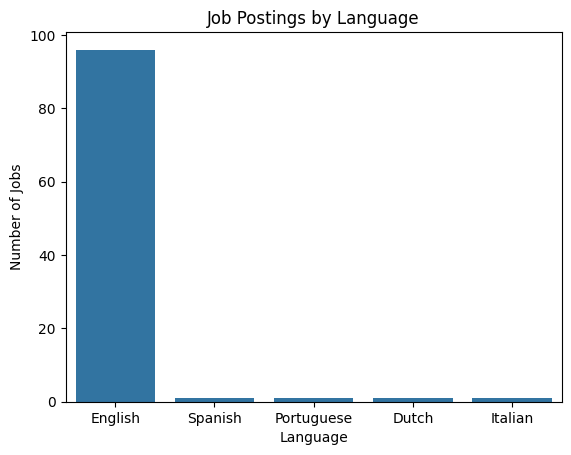

In [134]:
# jobs by language
sns.countplot(data=api_ai_data_df, x='language', order=api_ai_data_df['language'].value_counts().index)
plt.title("Job Postings by Language")
plt.xlabel("Language")
plt.ylabel("Number of Jobs")
plt.show()

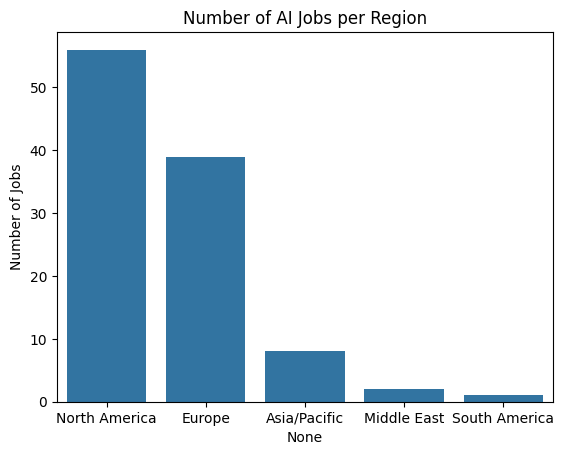

In [135]:
# jobs per region
region_cols = ['Asia/Pacific', 'Europe', 'Middle East', 'North America', 'South America']

region_counts = api_ai_data_df[region_cols].sum().sort_values(ascending=False)

sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Number of AI Jobs per Region")
plt.ylabel("Number of Jobs")
plt.show()

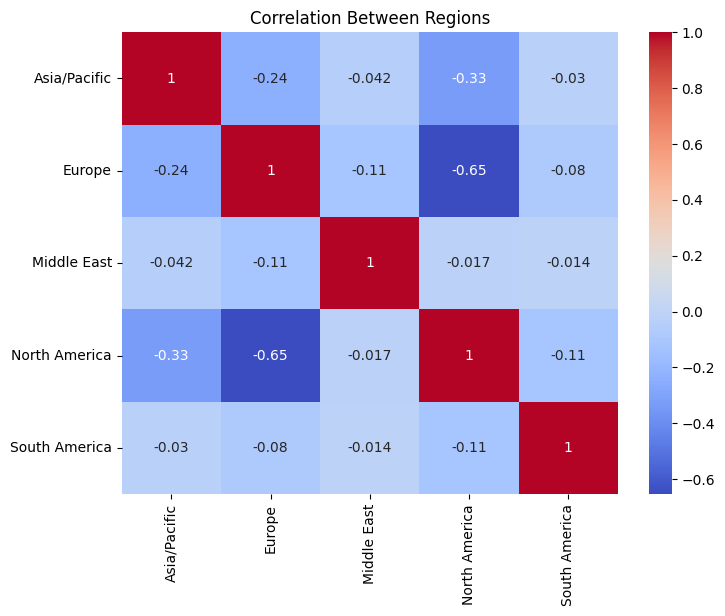

In [136]:
# co-occurene between regions
plt.figure(figsize=(8,6))
sns.heatmap(api_ai_data_df[region_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Regions")
plt.show()